In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
from PIL import Image
from numpy import *
from pylab import *
from scipy.ndimage import filters
import matplotlib.pyplot as plt
import cv2

In [3]:
im = Image.open("pic_to_process.jpg")

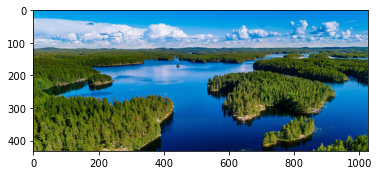

In [4]:
plt.imshow(im)

In [5]:
im.size

(1028, 432)

In [6]:
gray()

<Figure size 432x288 with 0 Axes>

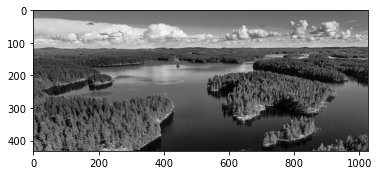

In [7]:
imageG = im.convert('L')
plt.imshow(imageG)

(432, 1028) uint8


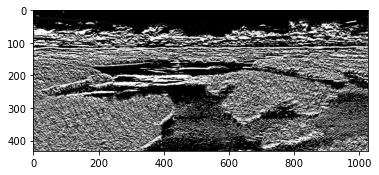

In [8]:
# gaussian filter and convert to unsigned 8-bit array

imageG5x = filters.gaussian_filter(imageG, (1,1), (1,0))
print (imageG5x.shape, imageG5x.dtype)
# convert to image and write output
outputx = Image.fromarray(imageG5x,'L')
outputx.save('derivativex.jpg')

plt.imshow(outputx)

(432, 1028) uint8


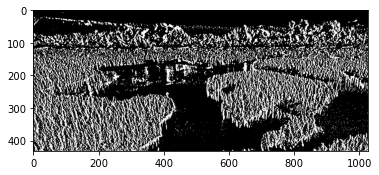

In [9]:
# gaussian filter and convert to unsigned 8-bit array
imageG5y = filters.gaussian_filter(imageG, (1,1), (0,1))
print (imageG5y.shape, imageG5y.dtype)
# convert to image and write output
outputy = Image.fromarray(imageG5y,'L')
outputy.save('derivativey.jpg')
plt.imshow(outputy)

(432, 1028) int64


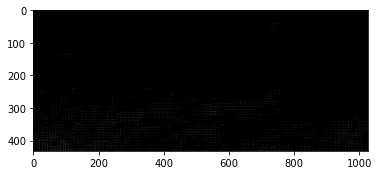

In [10]:
## add
imageG5xy=np.add(imageG5x,imageG5y,dtype=np.int64)
print (imageG5xy.shape, imageG5xy.dtype)
# convert to image and write output
outputxy = Image.fromarray(imageG5xy, 'L')
outputxy.save('derivativexy.jpg')
plt.imshow(outputxy)

In [11]:
pixels = asarray(imageG5xy)
#pixels = asarray(im)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Min: 0.000, Max: 510.000


(432, 1028) uint8


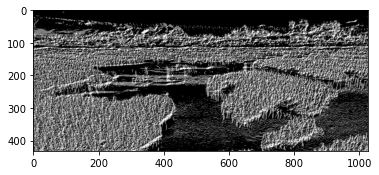

In [13]:
normalize_image = cv2.normalize(imageG5xy, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)

normalize_image = normalize_image.astype(np.uint8)


#imageG5xy=np.add(imageG5x,imageG5y,dtype=np.int64)
print (normalize_image.shape, normalize_image.dtype)
# convert to image and write output
normalize_imagexy = Image.fromarray(normalize_image, 'L')
normalize_imagexy.save('normalize_image.jpg')
plt.imshow(normalize_imagexy)